In [65]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [66]:
target_size = (224, 224)
train_transform = transforms.Compose(
    [#transforms.Resize(target_size),
     transforms.ToTensor(),
     transforms.RandomHorizontalFlip(p=0.5),
     #transforms.AutoAugment(transforms.AutoAugmentPolicy.CIFAR10),
     #transforms.ToTensor(),
     transforms.Normalize(
           [0.485, 0.456, 0.406], 
            [0.229, 0.224, 0.225]),
     ])

transform = transforms.Compose(
    [#transforms.Resize(target_size),
     transforms.ToTensor(),
     transforms.Normalize(
            [0.485, 0.456, 0.406], 
            [0.229, 0.224, 0.225])])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 bird  bird  frog truck


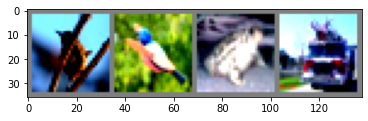

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [68]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.silu(self.conv1(x)))
        x = self.pool(F.silu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.silu(self.fc1(x))
        x = F.silu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [69]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [70]:
for epoch in range(3):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.193
[1,  4000] loss: 1.842
[1,  6000] loss: 1.620
[1,  8000] loss: 1.522
[1, 10000] loss: 1.450
[1, 12000] loss: 1.414
[2,  2000] loss: 1.342
[2,  4000] loss: 1.313
[2,  6000] loss: 1.292
[2,  8000] loss: 1.294
[2, 10000] loss: 1.250
[2, 12000] loss: 1.221
[3,  2000] loss: 1.166
[3,  4000] loss: 1.170
[3,  6000] loss: 1.174
[3,  8000] loss: 1.148
[3, 10000] loss: 1.133
[3, 12000] loss: 1.137
Finished Training


In [71]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 60 %
